<a href="https://colab.research.google.com/github/RafsanJany-44/ACM/blob/master/SHAP_TEST_RF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
!pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement shap-0.41 (from versions: none)
ERROR: No matching distribution found for shap-0.41


In [13]:
import pandas as pd
import shap
import sklearn
from sklearn.preprocessing import LabelEncoder
data = 'https://raw.githubusercontent.com/RafsanJany-44/Thesis_Project/main/All_DATA/without_sn_and_Epoch/EEG_HMC.csv'
dataset = pd.read_csv(data)
encoder=LabelEncoder()
dataset["Sleep Stage"]=encoder.fit_transform(dataset["Sleep Stage"])
shap.initjs()
X = dataset.iloc[:, 1:]
y = dataset.iloc[:, 0]

dataset.head()

,Sleep Stage,MeanP_Alpha_F4,MedianF_Alpha_F4,MeanF_Alpha_F4,Spectral Edge_Alpha_F4,PeakF_Alpha_F4,MeanP_Beta_F4,MedianF_Beta_F4,MeanF_Beta_F4,Spectral Edge_Beta_F4,...,MeanP_Delta_O2,MedianF_Delta_O2,MeanF_Delta_O2,Spectral Edge_Delta_O2,PeakF_Delta_O2,MeanP_Gamma_O2,MedianF_Gamma_O2,MeanF_Gamma_O2,Spectral Edge_Gamma_O2,PeakF_Gamma_O2
0,4,0.00051,8.74146,18.48195,17.48293,8.24195,0.00071,19.73073,29.84585,33.84195,...,0.00724,0.74927,3.87122,1.99805,0.87415,0.000210,35.21561,42.20878,49.95122,49.95122
1,4,0.00040,10.24000,17.48293,16.85854,10.61463,0.00051,17.23317,26.34927,29.34634,...,0.00723,0.49951,3.74634,1.24878,0.49951,0.000095,34.34146,43.33268,49.95122,49.95122
2,4,0.00036,9.74049,17.98244,17.48293,8.74146,0.00047,17.60780,25.47512,28.22244,...,0.00230,0.62439,5.24488,2.12293,0.62439,0.000074,34.59122,45.95512,49.95122,49.95122
3,4,0.00035,10.11512,17.60780,17.10829,9.61561,0.00047,17.35805,26.47415,28.72195,...,0.00091,0.87415,6.61854,3.12195,0.62439,0.000082,32.46829,43.95707,49.95122,49.95122
4,4,0.00033,9.74049,17.60780,17.23317,8.11707,0.00043,17.23317,25.84976,28.09756,...,0.00175,0.49951,5.74439,2.24780,0.49951,0.000077,33.59220,44.83122,49.95122,49.95122


In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train =sc.fit_transform(X_train)

X_test =sc.fit_transform(X_test)

In [16]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=10, random_state=0)
rf.fit(X_train, y_train)
y_pred_RF=rf.predict(X_test)

In [19]:
# Fits the explainer
explainer = shap.Explainer(rf.predict, X_test[0:100])
# Calculates the SHAP values - It takes some time
shap_values = explainer(X_test[0:100])

Permutation explainer: 101it [00:15,  2.65it/s]


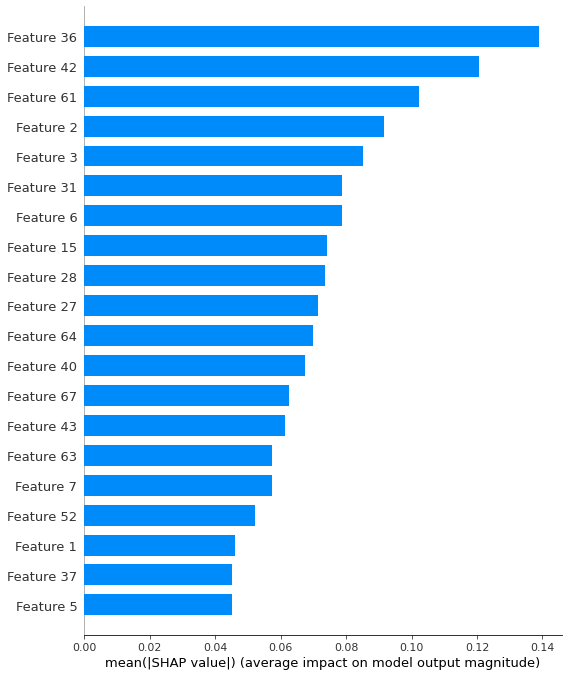

In [26]:
shap.summary_plot(shap_values, X, plot_type="bar")

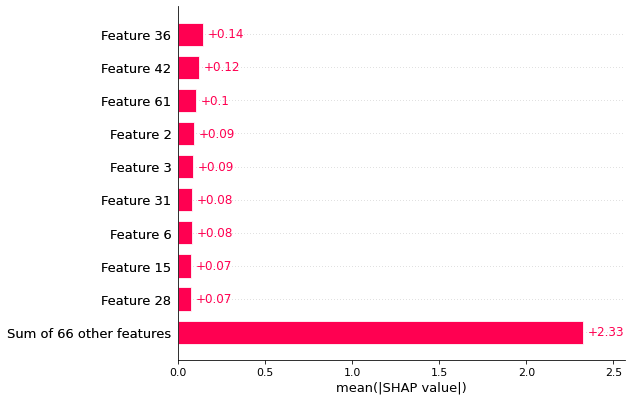

In [29]:
shap.plots.bar(shap_values)

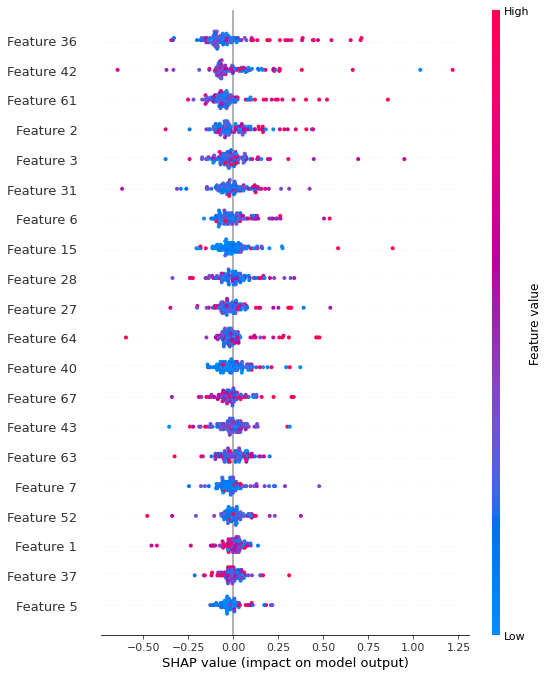

In [30]:
shap.summary_plot(shap_values)

In [31]:
explainer = shap.TreeExplainer(rf)

start_index = 1
end_index = 2
shap_values = explainer.shap_values(X_test[start_index:end_index])
X_test[start_index:end_index]

array([[-0.07128211, -0.42013962, -0.27598229, -0.33908564, -0.3812788 ,
        -0.11819742, -0.26570583, -0.27467999, -0.35752567, -0.52751116,
        -0.06456097, -0.08908247, -0.27362127, -0.14960773, -0.14867496,
        -0.14435426, -0.16027546,  0.03378416, -0.1369385 , -0.16088307,
        -0.07139812, -0.69218883, -0.83685024, -0.39252542,  0.45886044,
        -0.08409241, -0.2717534 , -0.44349142, -0.47504132, -0.33361562,
        -0.06652937, -0.37385296, -0.33484667, -0.43593593, -0.59512617,
        -0.07490281, -0.08340833, -0.29376569, -0.15123637,  0.12118327,
        -0.14511616, -0.05273339,  0.12987881,  0.0216822 , -0.10270512,
        -0.04793612, -0.75947734, -0.97751297, -0.87293857,  0.47586762,
        -0.08540361, -0.1004032 , -0.31195487, -0.35663385, -0.23956748,
        -0.14025781, -0.343229  , -0.37907012, -0.46642903, -0.52782958,
        -0.07517717, -0.10126412, -0.18706757, -0.14064453, -0.18597695,
        -0.15016149, -0.14864887, -0.00492157, -0.1

In [32]:
print(shap_values[0].shape)
shap_values

(1, 75)


[array([[-8.71296427e-04, -5.07537584e-04, -8.89467390e-03,
         -1.14652237e-02,  7.80959880e-03,  4.11984561e-03,
         -2.23294919e-02,  1.23290210e-03,  2.24364019e-05,
          1.65080900e-03, -2.01186498e-03,  5.07144713e-04,
          2.48246324e-03, -5.25998788e-04, -5.01558549e-03,
         -6.98472383e-03, -1.98078610e-03, -1.55652365e-03,
         -5.00907480e-03, -5.24710222e-03,  1.22589169e-02,
         -2.88217446e-03, -7.23284460e-03,  5.25277156e-04,
         -5.88345374e-04,  1.70321087e-03,  4.72580175e-03,
         -1.22066046e-02, -1.83646021e-02,  1.68419772e-03,
         -8.60316484e-04, -2.25173574e-03,  1.03973241e-03,
         -1.43999408e-03,  2.07717312e-03,  8.40849848e-04,
         -6.47141664e-03,  2.01566150e-03,  9.90372710e-04,
          4.28993714e-03,  1.33737042e-02, -1.66118863e-03,
          1.74468139e-02,  8.81542058e-05, -2.70757828e-04,
          6.67155968e-03,  5.02402095e-04,  2.17220622e-03,
          2.88957248e-03,  4.68001341e-0

In [34]:
shap.initjs()
# Force plot
prediction = rf.predict(X_test[start_index:end_index])[0]
print(f"The RF predicted: {prediction}")
shap.force_plot(explainer.expected_value[1],
                shap_values[1],
                X_test[start_index:end_index])

The RF predicted: 3


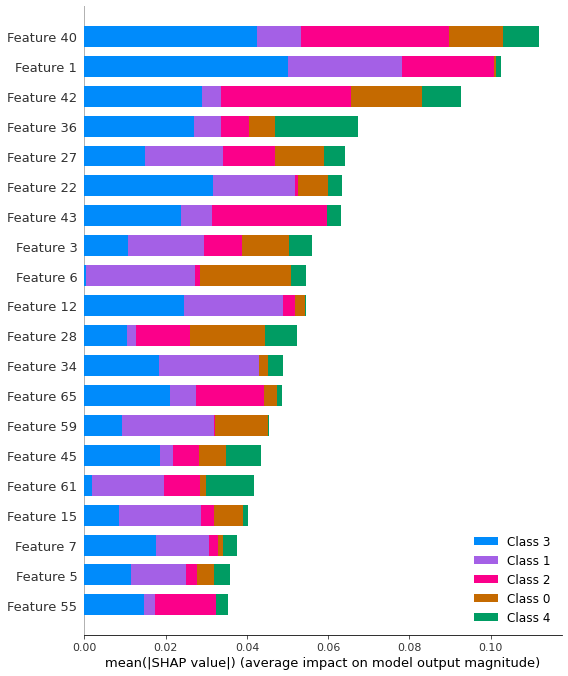

In [35]:
shap.summary_plot(shap_values, X_test)